In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [10]:
ms = pd.read_csv('microsoft.csv')
ms['MA20'] = ms['Close'].rolling(20).mean()
ms['MA100'] = ms['Close'].rolling(100).mean()
ms = ms.dropna()
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA100
99,2015-05-26,46.830002,46.880001,46.189999,46.590000,43.565056,29581900,47.7770,44.2360
100,2015-05-27,46.820000,47.770000,46.619999,47.610001,44.518841,27335600,47.6995,44.2476
101,2015-05-28,47.500000,48.020000,47.389999,47.450001,44.369232,19283700,47.6190,44.2545
102,2015-05-29,47.430000,47.570000,46.590000,46.860001,43.817532,35428100,47.5300,44.2598
103,2015-06-01,47.060001,47.770000,46.619999,47.230000,44.163509,28837300,47.4585,44.2756


In [12]:
ms['Shares'] = [1 if ms.loc[ei,'MA20']>ms.loc[ei,'MA100'] else 0 for ei in ms.index]

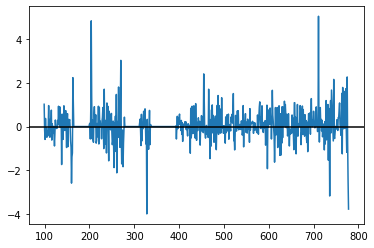

In [13]:
ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]
ms['Profit'].plot()
plt.axhline(y=0, color='black')

In [14]:
ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA100,Shares,Close1,Profit,wealth
775,2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,89.8285,82.3042,1,95.010002,2.270004,32.680005
776,2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,90.2815,82.5109,1,94.260002,-0.750000,31.930005
777,2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,90.6770,82.7137,1,91.779999,-2.480003,29.450002
778,2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,90.9105,82.8839,1,88.000000,-3.779999,25.670003
779,2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,90.9010,83.0171,1,NaN,NaN,NaN


<AxesSubplot:>

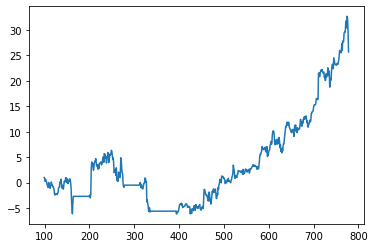

In [16]:
ms['wealth'].plot()

In [21]:
print("Total money you win is",ms.loc[ms.index[-2]], 'wealth')

Total money you win is Date         2018-02-02
Open          93.639999
High          93.970001
Low                91.5
Close         91.779999
Adj Close     91.350883
Volume         47867800
MA20            90.9105
MA100           82.8839
Shares                1
Close1             88.0
Profit        -3.779999
wealth        25.670003
Name: 778, dtype: object wealth


Text(0.5, 1.0, 'Total money you win is 25.670003')

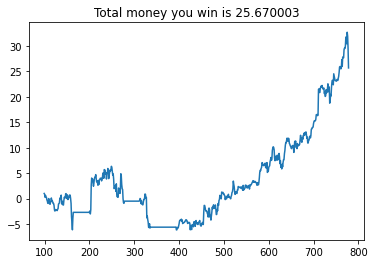

In [22]:
ms['wealth'].plot()
plt.title('Total money you win is {}'.format(ms.loc[ms.index[-2], 'wealth']))